<a href="https://colab.research.google.com/github/Varsha-1403/Prosumer-Energy-Predict/blob/feature-eda-train-forecast/Notebook/eda_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [16]:
!ls ~/.kaggle


kaggle_2.json  kaggle.json


In [19]:
!kaggle competitions download -c predict-energy-behavior-of-prosumers


 97% 226M/233M [00:02<00:00, 66.2MB/s]
100% 233M/233M [00:02<00:00, 82.1MB/s]


In [ ]:
!unzip predict-energy-behavior-of-prosumers.zip

Archive:  predict-energy-behavior-of-prosumers.zip
  inflating: client.csv              
  inflating: county_id_to_name_map.json  
  inflating: electricity_prices.csv  
  inflating: enefit/__init__.py      
  inflating: enefit/competition.cpython-310-x86_64-linux-gnu.so  
  inflating: example_test_files/client.csv  
  inflating: example_test_files/electricity_prices.csv  
  inflating: example_test_files/forecast_weather.csv  
  inflating: example_test_files/gas_prices.csv  
  inflating: example_test_files/historical_weather.csv  
  inflating: example_test_files/revealed_targets.csv  
  inflating: example_test_files/sample_submission.csv  
  inflating: example_test_files/test.csv  
replace forecast_weather.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
pip install pyecharts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 6.6 MB/s eta 0:00:00


In [ ]:
pip install snapshot_selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.7/475.7 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Load the datasets
client = pd.read_csv('client.csv')
gs_prices = pd.read_csv('gas_prices.csv')
electricity_prices = pd.read_csv('electricity_prices.csv')
train = pd.read_csv('train.csv')
historical_weather = pd.read_csv('historical_weather.csv')
forecast_weather = pd.read_csv('forecast_weather.csv')
weather_station_to_county = pd.read_csv('weather_station_to_county_mapping.csv')


In [ ]:
# Display the first few rows of each dataset
print("Client Data:")
client.head()

Client Data:


product_type  county  eic_count  installed_capacity  is_business  \
0             1       0        108              952.89            0   
1             2       0         17              166.40            0   
2             3       0        688             7207.88            0   
3             0       0          5              400.00            1   
4             1       0         43             1411.00            1   

         date  data_block_id  
0  2021-09-01              2  
1  2021-09-01              2  
2  2021-09-01              2  
3  2021-09-01              2  
4  2021-09-01              2

In [ ]:

print("Gas Prices Data:")
gs_prices.head()

Gas Prices Data:


forecast_date  lowest_price_per_mwh  highest_price_per_mwh origin_date  \
0    2021-09-01                 45.23                  46.32  2021-08-31   
1    2021-09-02                 45.62                  46.29  2021-09-01   
2    2021-09-03                 45.85                  46.40  2021-09-02   
3    2021-09-04                 46.30                  46.80  2021-09-03   
4    2021-09-05                 46.30                  46.58  2021-09-04   

   data_block_id  
0              1  
1              2  
2              3  
3              4  
4              5

In [ ]:

print("Electricity Prices Data:")
electricity_prices.head()

Electricity Prices Data:


forecast_date  euros_per_mwh          origin_date  data_block_id
0  2021-09-01 00:00:00          92.51  2021-08-31 00:00:00              1
1  2021-09-01 01:00:00          88.90  2021-08-31 01:00:00              1
2  2021-09-01 02:00:00          87.35  2021-08-31 02:00:00              1
3  2021-09-01 03:00:00          86.88  2021-08-31 03:00:00              1
4  2021-09-01 04:00:00          88.43  2021-08-31 04:00:00              1

In [ ]:
print("Train Data:")
train.head()

Train Data:


county  is_business  product_type  target  is_consumption  \
0       0            0             1   0.713               0   
1       0            0             1  96.590               1   
2       0            0             2   0.000               0   
3       0            0             2  17.314               1   
4       0            0             3   2.904               0   

              datetime  data_block_id  row_id  prediction_unit_id  
0  2021-09-01 00:00:00              0       0                   0  
1  2021-09-01 00:00:00              0       1                   0  
2  2021-09-01 00:00:00              0       2                   1  
3  2021-09-01 00:00:00              0       3                   1  
4  2021-09-01 00:00:00              0       4                   2

In [ ]:

print("Historical Weather Data:")
historical_weather.head()

Historical Weather Data:


datetime  temperature  dewpoint  rain  snowfall  \
0  2021-09-01 00:00:00         14.2      11.6   0.0       0.0   
1  2021-09-01 00:00:00         13.9      11.5   0.0       0.0   
2  2021-09-01 00:00:00         14.0      12.5   0.0       0.0   
3  2021-09-01 00:00:00         14.6      11.5   0.0       0.0   
4  2021-09-01 00:00:00         15.7      12.9   0.0       0.0   

   surface_pressure  cloudcover_total  cloudcover_low  cloudcover_mid  \
0            1015.9                31              31               0   
1            1010.7                33              37               0   
2            1015.0                31              34               0   
3            1017.3                 0               0               0   
4            1014.0                22              25               0   

   cloudcover_high  windspeed_10m  winddirection_10m  shortwave_radiation  \
0               11       7.083333                  8                  0.0   
1                0       5.111111                359                  0.0   
2                0       6.333333                355                  0.0   
3                0       8.083333                297                358.0   
4                0       8.416667                  5                  0.0   

   direct_solar_radiation  diffuse_radiation  latitude  longitude  \
0                     0.0                0.0      57.6       21.7   
1                     0.0                0.0      57.6       22.2   
2                     0.0                0.0      57.6       22.7   
3                   277.0               81.0      57.6       23.2   
4                     0.0                0.0      57.6       23.7   

   data_block_id  
0            1.0  
1            1.0  
2            1.0  
3            1.0  
4            1.0

In [ ]:


print("Forecast Weather Data:")
forecast_weather.head()

Forecast Weather Data:


latitude  longitude      origin_datetime  hours_ahead  temperature  \
0      57.6       21.7  2021-09-01 02:00:00            1    15.655786   
1      57.6       22.2  2021-09-01 02:00:00            1    13.003931   
2      57.6       22.7  2021-09-01 02:00:00            1    14.206567   
3      57.6       23.2  2021-09-01 02:00:00            1    14.844507   
4      57.6       23.7  2021-09-01 02:00:00            1    15.293848   

    dewpoint  cloudcover_high  cloudcover_low  cloudcover_mid  \
0  11.553613         0.904816        0.019714        0.000000   
1  10.689844         0.886322        0.004456        0.000000   
2  11.671777         0.729034        0.005615        0.000000   
3  12.264917         0.336304        0.074341        0.000626   
4  12.458887         0.102875        0.088074        0.000015   

   cloudcover_total  10_metre_u_wind_component  10_metre_v_wind_component  \
0          0.905899                  -0.411328                  -9.106137   
1          0.886658                   0.206347                  -5.355405   
2          0.730499                   1.451587                  -7.417905   
3          0.385468                   1.090869                  -9.163999   
4          0.176590                   1.268481                  -8.975766   

   data_block_id    forecast_datetime  direct_solar_radiation  \
0              1  2021-09-01 03:00:00                     0.0   
1              1  2021-09-01 03:00:00                     0.0   
2              1  2021-09-01 03:00:00                     0.0   
3              1  2021-09-01 03:00:00                     0.0   
4              1  2021-09-01 03:00:00                     0.0   

   surface_solar_radiation_downwards  snowfall  total_precipitation  
0                                0.0       0.0                  0.0  
1                                0.0       0.0                  0.0  
2                                0.0       0.0                  0.0  
3                                0.0       0.0                  0.0  
4                                0.0       0.0                  0.0

In [ ]:

print("Weather Station to County Data:")
weather_station_to_county.head()

Weather Station to County Data:


county_name  longitude  latitude  county
0         NaN       21.7      57.6     NaN
1         NaN       21.7      57.9     NaN
2         NaN       21.7      58.2     NaN
3         NaN       21.7      58.5     NaN
4         NaN       21.7      58.8     NaN

In [ ]:
print("Train Data Info:")
print(train.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   county              int64  
 1   is_business         int64  
 2   product_type        int64  
 3   target              float64
 4   is_consumption      int64  
 5   datetime            object 
 6   data_block_id       int64  
 7   row_id              int64  
 8   prediction_unit_id  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 138.6+ MB
None


In [ ]:
print("\nTrain Data Summary:")
print(train.describe())


Train Data Summary:
             county   is_business  product_type        target  is_consumption  \
count  2.018352e+06  2.018352e+06  2.018352e+06  2.017824e+06       2018352.0   
mean   7.297034e+00  5.368261e-01  1.898927e+00  2.748556e+02             0.5   
std    4.780990e+00  4.986421e-01  1.081766e+00  9.095024e+02             0.5   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00             0.0   
25%    3.000000e+00  0.000000e+00  1.000000e+00  3.780000e-01             0.0   
50%    7.000000e+00  1.000000e+00  2.000000e+00  3.113300e+01             0.5   
75%    1.100000e+01  1.000000e+00  3.000000e+00  1.802062e+02             1.0   
max    1.500000e+01  1.000000e+00  3.000000e+00  1.548027e+04             1.0   

       data_block_id        row_id  prediction_unit_id  
count   2.018352e+06  2.018352e+06        2.018352e+06  
mean    3.218746e+02  1.009176e+06        3.304538e+01  
std     1.826343e+02  5.826482e+05        1.959059e+01  
min     0.000000e+00 

In [ ]:
print("\nForecast Weather Data Info:")
print(forecast_weather.info())



Forecast Weather Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424512 entries, 0 to 3424511
Data columns (total 18 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   latitude                           float64
 1   longitude                          float64
 2   origin_datetime                    object 
 3   hours_ahead                        int64  
 4   temperature                        float64
 5   dewpoint                           float64
 6   cloudcover_high                    float64
 7   cloudcover_low                     float64
 8   cloudcover_mid                     float64
 9   cloudcover_total                   float64
 10  10_metre_u_wind_component          float64
 11  10_metre_v_wind_component          float64
 12  data_block_id                      int64  
 13  forecast_datetime                  object 
 14  direct_solar_radiation             float64
 15  surface_solar_radiation_downwards  fl

In [ ]:
print("\nForecast Weather Data Summary:")
print(forecast_weather.describe())


Forecast Weather Data Summary:
           latitude     longitude   hours_ahead   temperature      dewpoint  \
count  3.424512e+06  3.424512e+06  3.424512e+06  3.424512e+06  3.424512e+06   
mean   5.865000e+01  2.495000e+01  2.450000e+01  5.743913e+00  2.411946e+00   
std    6.873865e-01  2.015565e+00  1.385340e+01  7.844206e+00  7.121432e+00   
min    5.760000e+01  2.170000e+01  1.000000e+00 -2.749940e+01 -2.968357e+01   
25%    5.812500e+01  2.320000e+01  1.275000e+01  2.606445e-01 -2.364355e+00   
50%    5.865000e+01  2.495000e+01  2.450000e+01  4.872705e+00  1.835596e+00   
75%    5.917500e+01  2.670000e+01  3.625000e+01  1.114639e+01  7.302026e+00   
max    5.970000e+01  2.820000e+01  4.800000e+01  3.181069e+01  2.368057e+01   

       cloudcover_high  cloudcover_low  cloudcover_mid  cloudcover_total  \
count     3.424512e+06    3.424512e+06    3.424512e+06      3.424512e+06   
mean      3.946654e-01    4.346453e-01    3.590693e-01      6.819927e-01   
std       4.440425e-01    4.

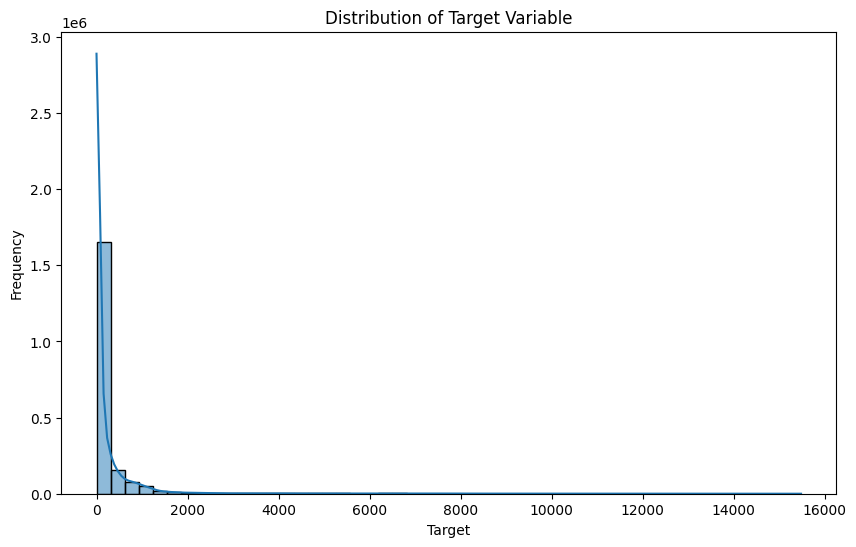

In [ ]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(train['target'], bins=50, kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

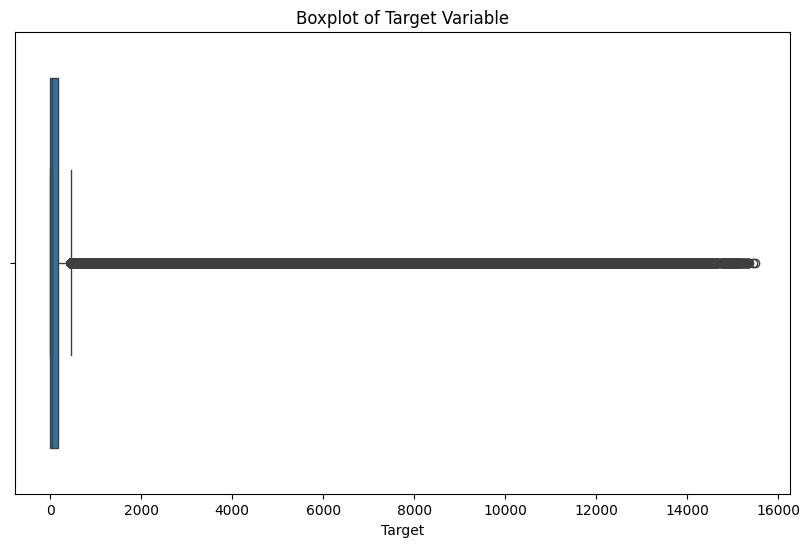

In [ ]:
# Boxplot of target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=train['target'])
plt.title('Boxplot of Target Variable')
plt.xlabel('Target')
plt.show()


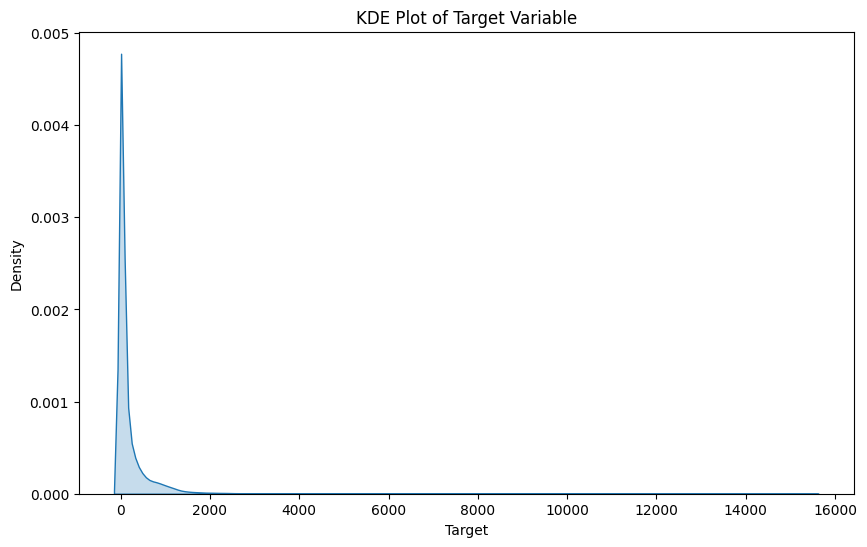

In [ ]:
# KDE plot of target variable
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train['target'], fill=True)
plt.title('KDE Plot of Target Variable')
plt.xlabel('Target')
plt.ylabel('Density')
plt.show()


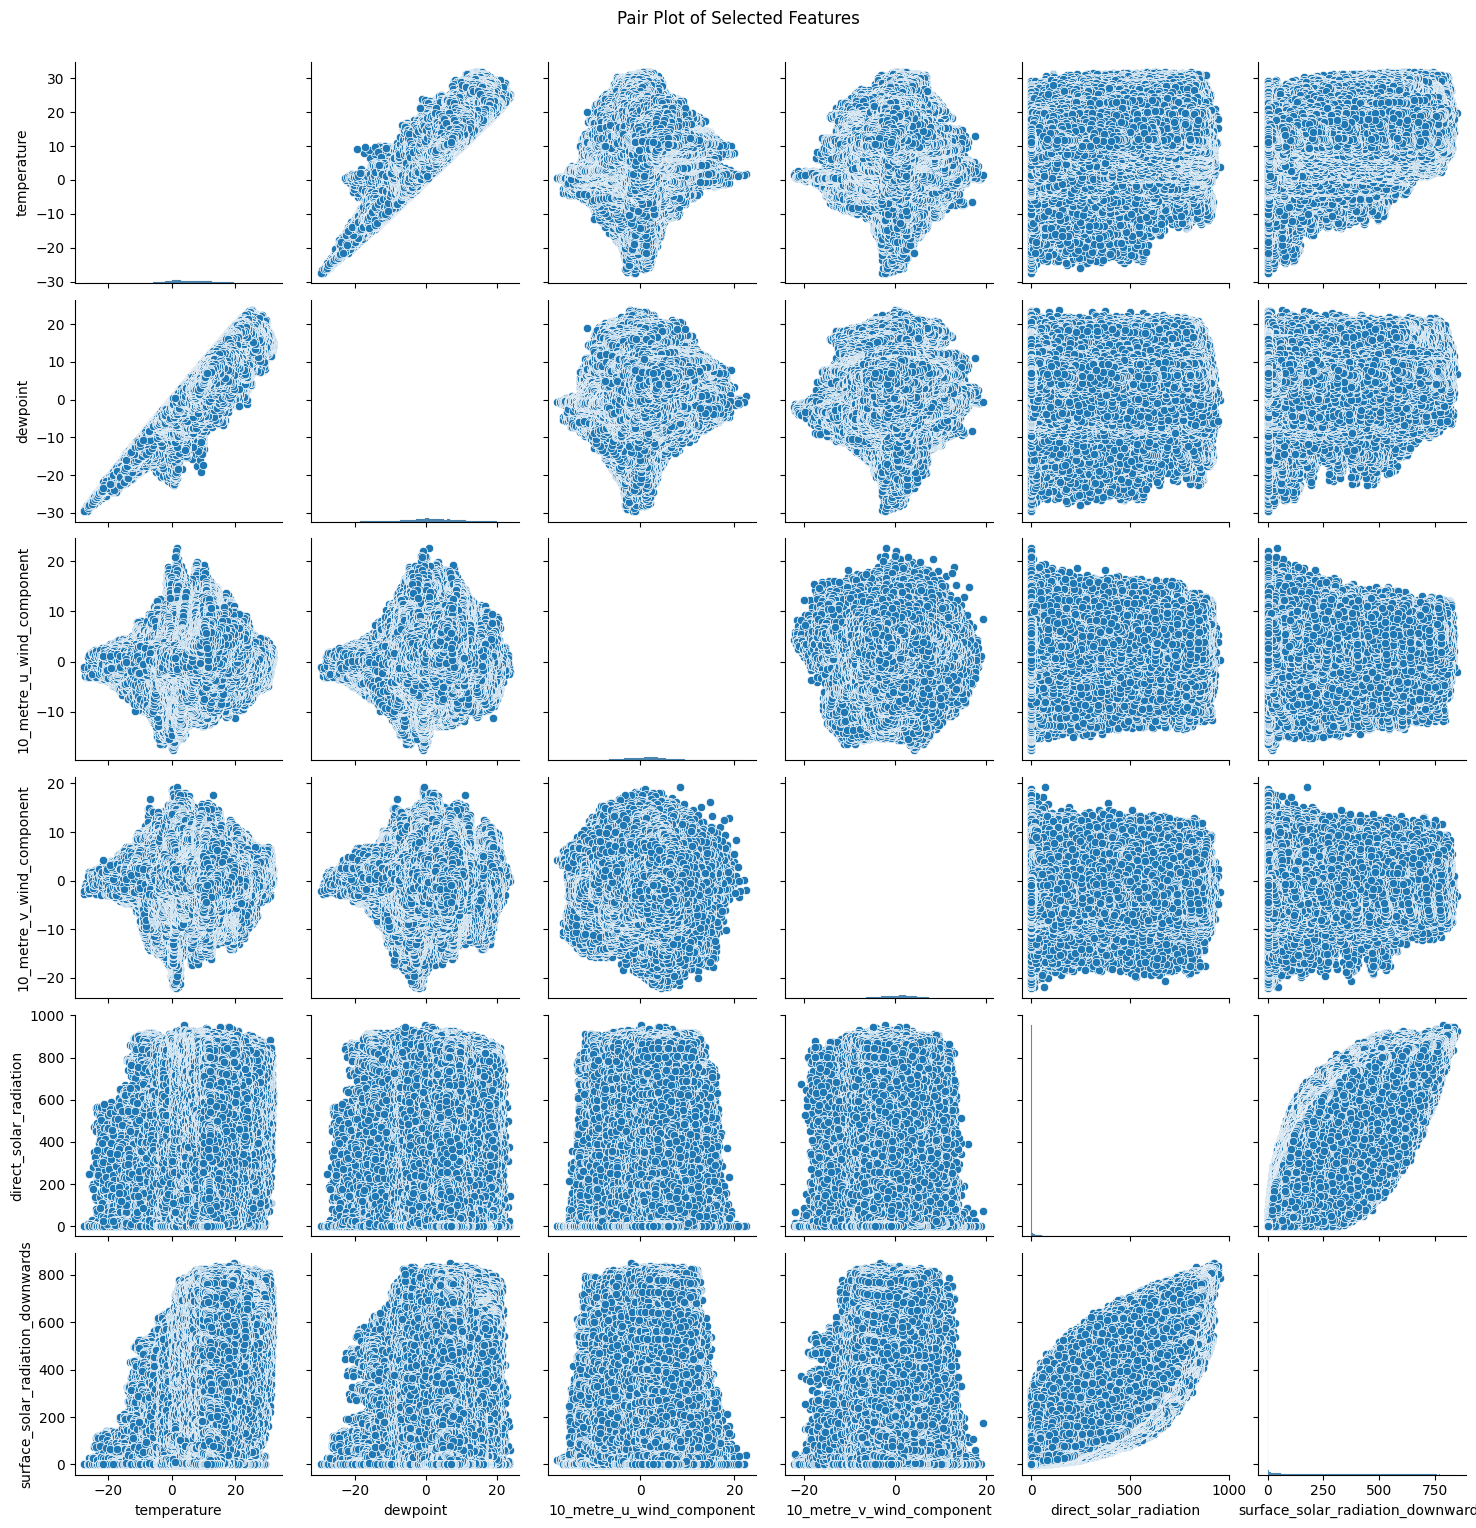

In [ ]:
# Pair plot of selected features
sns.pairplot(forecast_weather[['temperature', 'dewpoint', '10_metre_u_wind_component', '10_metre_v_wind_component', 'direct_solar_radiation', 'surface_solar_radiation_downwards']])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


This pair plot provides a visual overview of the relationships between temperature, dew point, wind components, and solar radiation.

In [ ]:
# Check the columns in the train DataFrame
print(train.columns)


Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'data_block_id', 'row_id', 'prediction_unit_id', 'hour'],
      dtype='object')


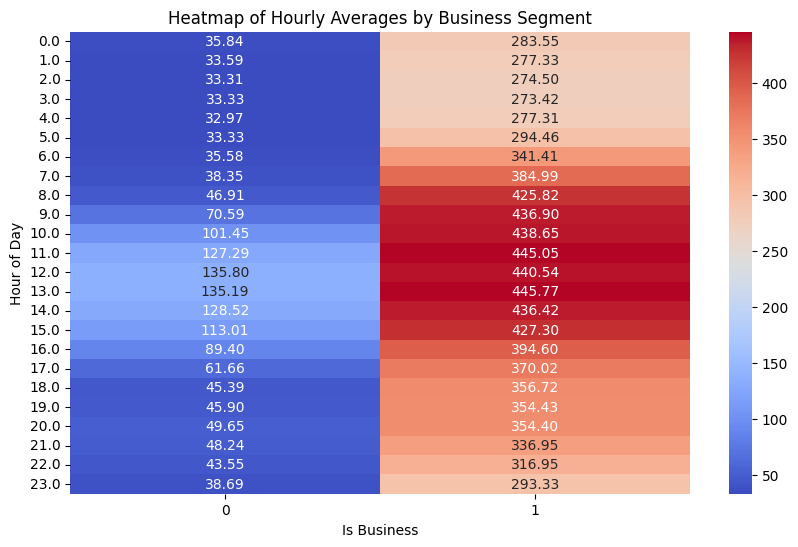

In [ ]:
# Ensure the datetime column is in datetime format
# Handle potential errors and incorrect formats
train['datetime'] = pd.to_datetime(train['datetime'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

# Extract hour from datetime
train['hour'] = train['datetime'].dt.hour

# Compute average target by hour and business segment
hourly_avg = train.groupby(['hour', 'is_business'])['target'].mean().unstack()

# Plot heatmap of hourly averages
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_avg, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap of Hourly Averages by Business Segment')
plt.xlabel('Is Business')
plt.ylabel('Hour of Day')
plt.show()

This heatmap visualizes the average values across different hours of the day for two business segments.
The heatmap allows for quick identification of trends over the day. For example, you might observe increasing or decreasing values as the day progresses.

In [ ]:
# Aggregated statistics by is_business
business_stats = train.groupby('is_business')['target'].agg(['mean', 'median', 'std']).reset_index()
print("Aggregated Statistics by Business Segment:")
print(business_stats)

# Aggregated statistics by product_type
product_type_stats = train.groupby('product_type')['target'].agg(['mean', 'median', 'std']).reset_index()
print("Aggregated Statistics by Product Type:")
print(product_type_stats)



Aggregated Statistics by Business Segment:
   is_business        mean  median          std
0            0  115.291266  18.505   362.678191
1            1  412.527347  59.218  1177.492089
Aggregated Statistics by Product Type:
   product_type        mean    median          std
0             0  238.022372  121.6635   331.009276
1             1   88.733616   18.7340   204.159858
2             2   19.602466    4.8925    41.645136
3             3  481.010672   74.6760  1295.576297


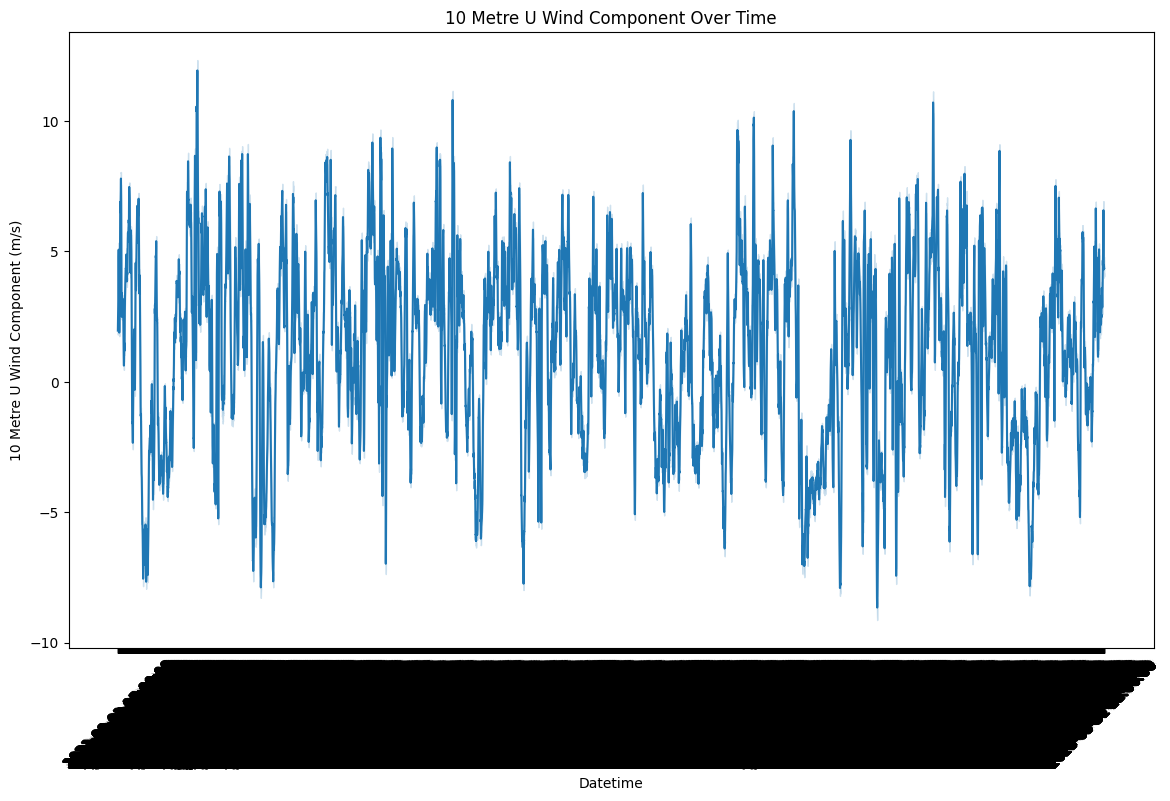

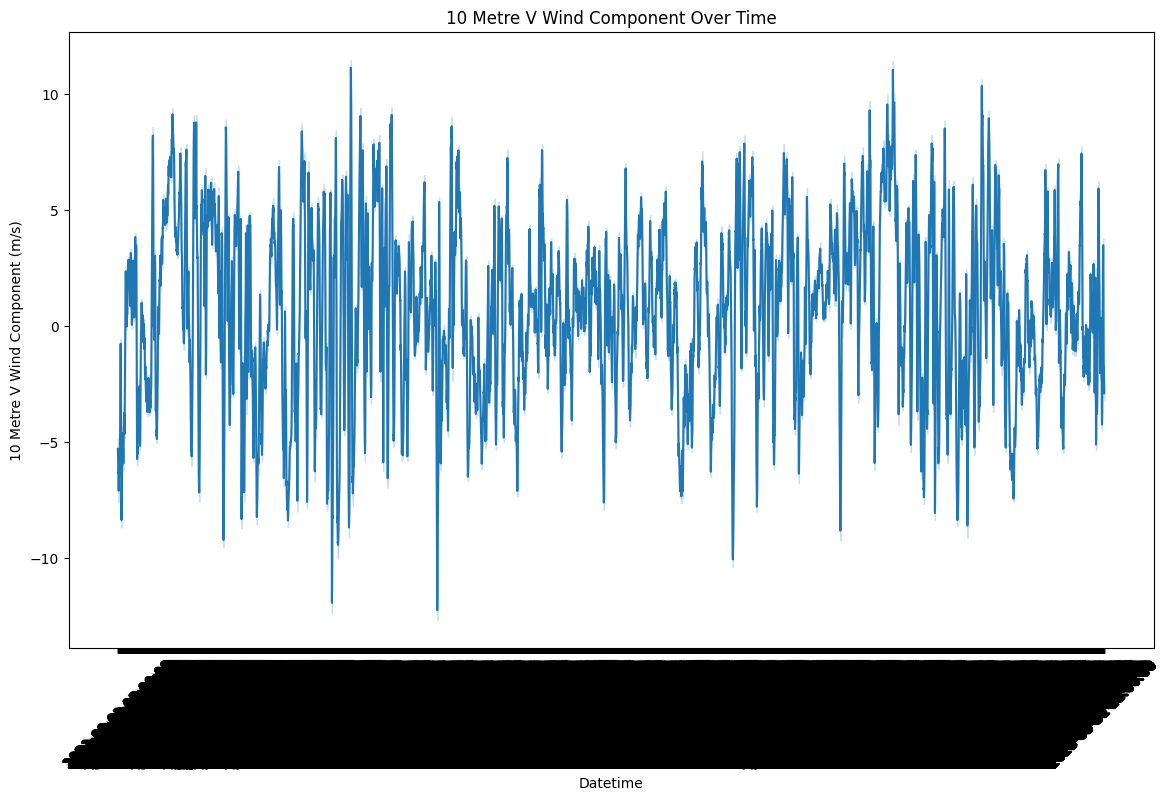

In [ ]:
# Plot 10 metre u wind component over time
plt.figure(figsize=(14, 8))
sns.lineplot(x='forecast_datetime', y='10_metre_u_wind_component', data=forecast_weather)
plt.title('10 Metre U Wind Component Over Time')
plt.xlabel('Datetime')
plt.ylabel('10 Metre U Wind Component (m/s)')
plt.xticks(rotation=45)
plt.show()

# Plot 10 metre v wind component over time
plt.figure(figsize=(14, 8))
sns.lineplot(x='forecast_datetime', y='10_metre_v_wind_component', data=forecast_weather)
plt.title('10 Metre V Wind Component Over Time')
plt.xlabel('Datetime')
plt.ylabel('10 Metre V Wind Component (m/s)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from pyecharts import options as opts
from pyecharts.charts import Line
from pyecharts.render import make_snapshot
from snapshot_selenium import snapshot

# Plot 10 metre u wind component over time
line_u = (
    Line()
    .add_xaxis(forecast_weather['forecast_datetime'].tolist())
    .add_yaxis('10 Metre U Wind Component (m/s)', forecast_weather['10_metre_u_wind_component'].tolist())
    .set_global_opts(title_opts=opts.TitleOpts(title='10 Metre U Wind Component Over Time'),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-45)))
)

line_u.render_notebook()

# Plot 10 metre v wind component over time
line_v = (
    Line()
    .add_xaxis(forecast_weather['forecast_datetime'].tolist())
    .add_yaxis('10 Metre V Wind Component (m/s)', forecast_weather['10_metre_v_wind_component'].tolist())
    .set_global_opts(title_opts=opts.TitleOpts(title='10 Metre V Wind Component Over Time'),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-45)))
)

line_v.render_notebook()



In [ ]:
from pyecharts import options as opts
from pyecharts.charts import Line

# Plot 10 metre u wind component over time
line_u = (
    Line()
    .add_xaxis(forecast_weather['forecast_datetime'].tolist())
    .add_yaxis('10 Metre U Wind Component (m/s)', forecast_weather['10_metre_u_wind_component'].tolist())
    .set_global_opts(title_opts=opts.TitleOpts(title='10 Metre U Wind Component Over Time'),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-45)))
)

line_u.render("10_metre_u_wind_component.html")

# Plot 10 metre v wind component over time
line_v = (
    Line()
    .add_xaxis(forecast_weather['forecast_datetime'].tolist())
    .add_yaxis('10 Metre V Wind Component (m/s)', forecast_weather['10_metre_v_wind_component'].tolist())
    .set_global_opts(title_opts=opts.TitleOpts(title='10 Metre V Wind Component Over Time'),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-45)))
)

line_v.render("10_metre_v_wind_component.html")


'/content/10_metre_v_wind_component.html'

In [ ]:
import plotly.express as px

# Plot 10 metre u wind component over time
fig = px.line(forecast_weather, x='forecast_datetime', y='10_metre_u_wind_component',
              title='10 Metre U Wind Component Over Time',
              labels={'forecast_datetime': 'Datetime', '10_metre_u_wind_component': '10 Metre U Wind Component (m/s)'})

fig.update_xaxes(tickangle=45)
fig.show()

# Plot 10 metre v wind component over time
fig = px.line(forecast_weather, x='forecast_datetime', y='10_metre_v_wind_component',
              title='10 Metre V Wind Component Over Time',
              labels={'forecast_datetime': 'Datetime', '10_metre_v_wind_component': '10 Metre V Wind Component (m/s)'})

fig.update_xaxes(tickangle=45)
fig.show()


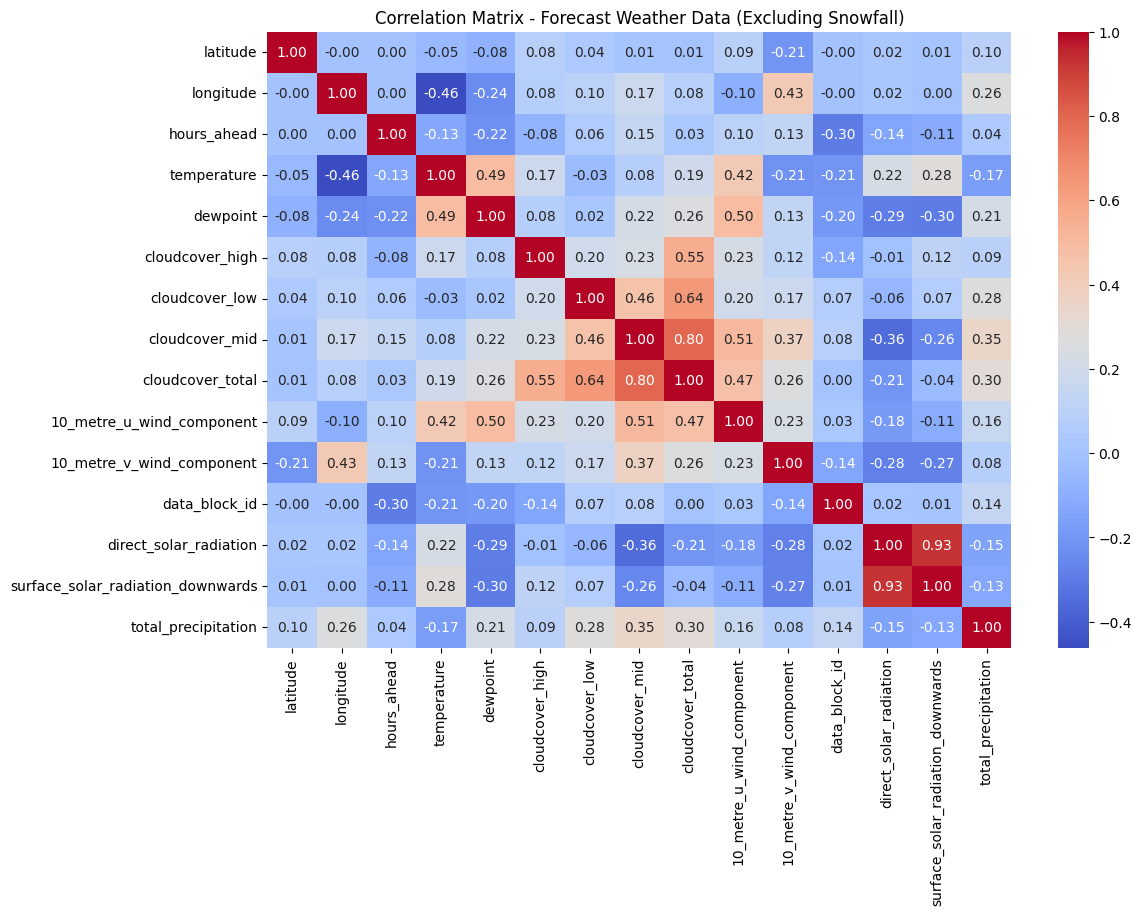

In [ ]:

# Select only the numeric columns from forecast_weather DataFrame
numeric_forecast_weather = forecast_weather.select_dtypes(include=[np.number])

# Remove 'snowfall' column if it exists
if 'snowfall' in numeric_forecast_weather.columns:
    numeric_forecast_weather.drop(columns=['snowfall'], inplace=True)

# Compute the correlation matrix
correlation_matrix = numeric_forecast_weather.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Forecast Weather Data (Excluding Snowfall)')
plt.show()

Temperature and dew point rise together. Higher temperatures usually mean higher dew points.
The amount of direct solar radiation and surface solar radiation going downwards are almost perfectly linked. When one goes up, the other does too.
surface_solar_radiation_downwards and direct_solar_radiation (0.93): These two variables are strongly positively correlated, meaning that higher direct solar radiation is associated with higher downward solar radiation.
cloudcover_mid and cloudcover_total (0.80): Mid-level cloud cover is a major contributor to the total cloud cover.


In [ ]:
# Merge train data with forecast weather data
merged_train_forecast = pd.merge(train, forecast_weather, how='left', left_on=['data_block_id', 'datetime'], right_on=['data_block_id', 'forecast_datetime'])


In [ ]:
# Example: Convert columns to smaller data types
train['data_block_id'] = train['data_block_id'].astype('int32')
forecast_weather['data_block_id'] = forecast_weather['data_block_id'].astype('int32')


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
merged_train_forecast = pd.merge(train, forecast_weather, how='left', left_on=['data_block_id', 'datetime'], right_on=['data_block_id', 'forecast_datetime'])


NameError: name 'pd' is not defined

In [ ]:
# Select only the numeric columns from merged_train_forecast DataFrame
numeric_merged_train_forecast = merged_train_forecast.select_dtypes(include=[np.number])

# Remove 'snowfall' column if it exists
if 'snowfall' in numeric_merged_train_forecast.columns:
     numeric_merged_train_forecast.drop(columns=['snowfall'], inplace=True)

# Compute the correlation matrix
corr_forecast = numeric_merged_train_forecast.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_forecast, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Merged Train Forecast Data')
plt.show()


NameError: name 'np' is not defined

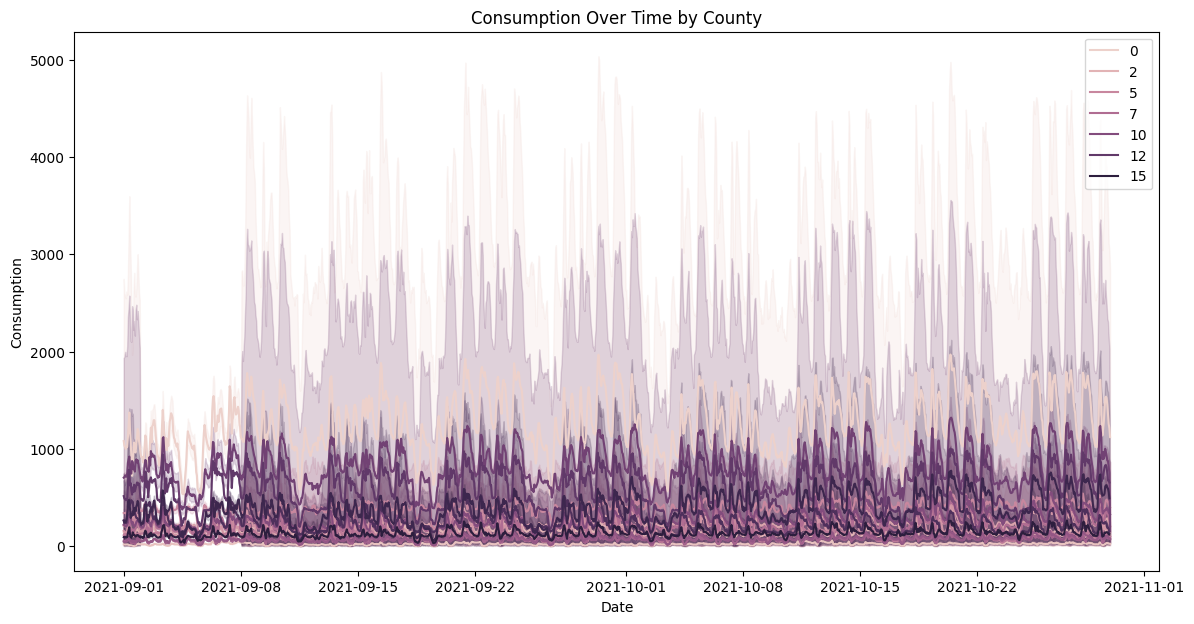

In [ ]:
# Convert datetime to pandas datetime format
merged_train_forecast['datetime'] = pd.to_datetime(merged_train_forecast['datetime'])

# Plot consumption over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_train_forecast[merged_train_forecast['is_consumption'] == 1], x='datetime', y='target', hue='county')
plt.title('Consumption Over Time by County')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Convert datetime to pandas datetime format with error handling
merged_train_forecast['datetime'] = pd.to_datetime(merged_train_forecast['datetime'], errors='coerce')

# Remove rows with NaT values in datetime column
merged_train_forecast = merged_train_forecast.dropna(subset=['datetime'])

# Plot consumption over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_train_forecast[merged_train_forecast['is_consumption'] == 1], x='datetime', y='target', hue='county')
plt.title('Consumption Over Time by County')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend(loc='upper right')
plt.show()

NameError: name 'merged_train_forecast' is not defined

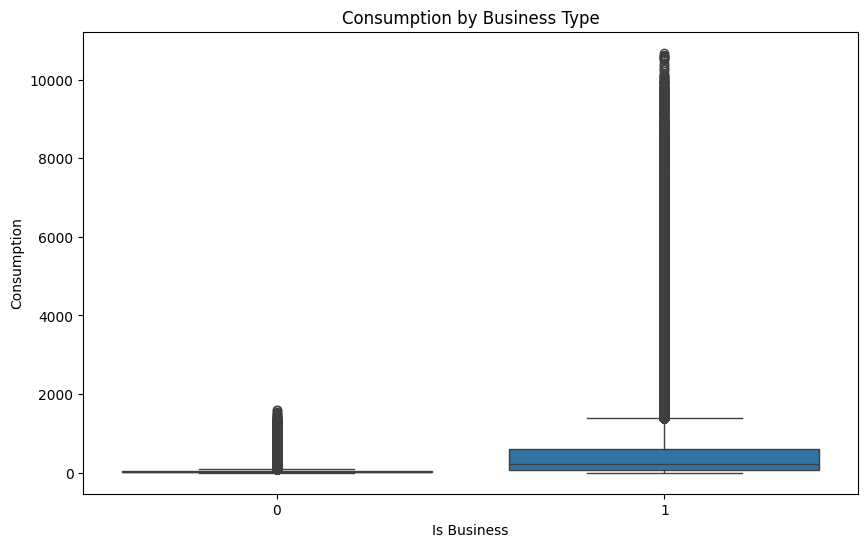

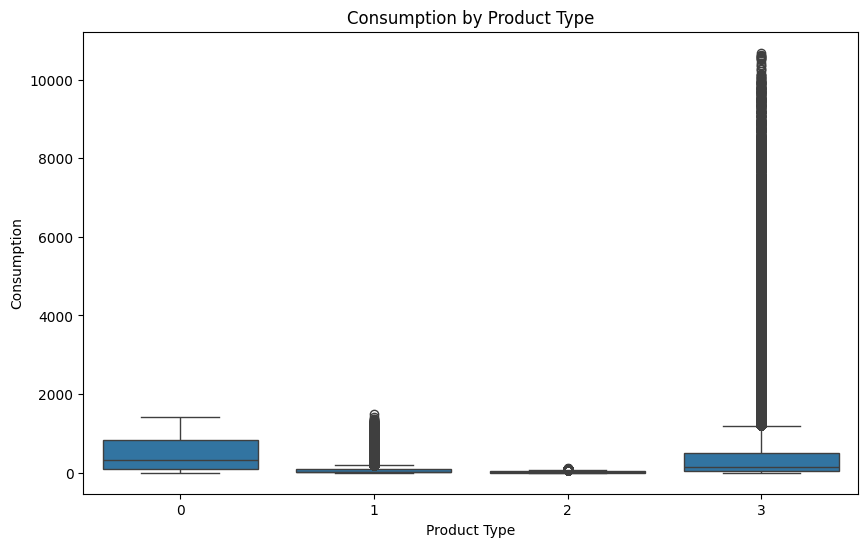

In [ ]:
# Consumption by business type
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_train_forecast[merged_train_forecast['is_consumption'] == 1], x='is_business', y='target')
plt.title('Consumption by Business Type')
plt.xlabel('Is Business')
plt.ylabel('Consumption')
plt.show()

# Consumption by product type
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_train_forecast[merged_train_forecast['is_consumption'] == 1], x='product_type', y='target')
plt.title('Consumption by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Consumption')
plt.show()


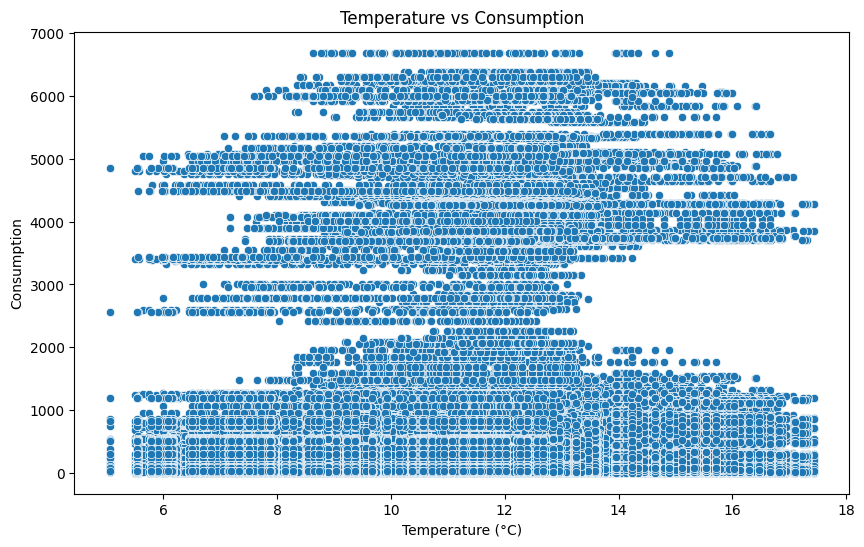

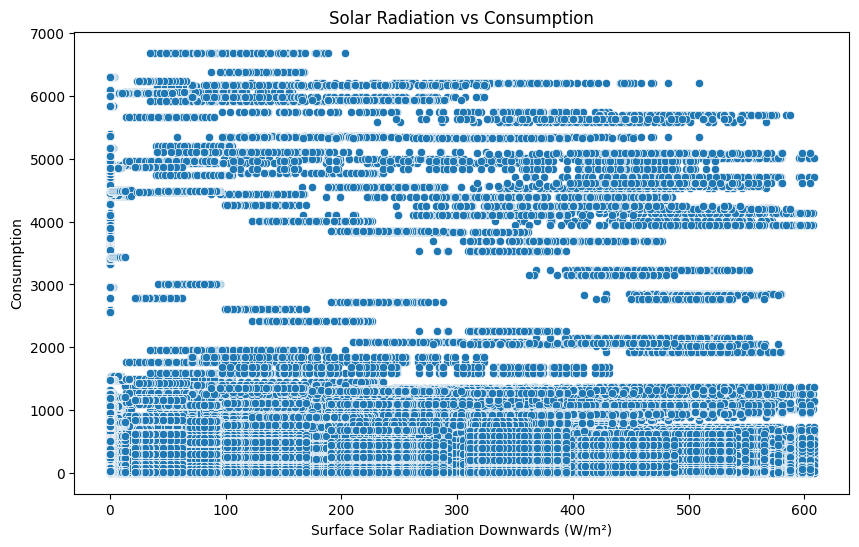

In [ ]:
# Effect of temperature on consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_train_forecast[merged_train_forecast['is_consumption'] == 1], x='temperature', y='target')
plt.title('Temperature vs Consumption')
plt.xlabel('Temperature (°C)')
plt.ylabel('Consumption')
plt.show()

# Effect of solar radiation on consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_train_forecast[merged_train_forecast['is_consumption'] == 1], x='surface_solar_radiation_downwards', y='target')
plt.title('Solar Radiation vs Consumption')
plt.xlabel('Surface Solar Radiation Downwards (W/m²)')
plt.ylabel('Consumption')
plt.show()


In [ ]:
# Extract month and hour from datetime
merged_train_forecast['month'] = merged_train_forecast['datetime'].dt.month
merged_train_forecast['hour'] = merged_train_forecast['datetime'].dt.hour

# Plot consumption by month
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_train_forecast[merged_train_forecast['is_consumption'] == 1], x='month', y='target')
plt.title('Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Consumption')
plt.show()

# Plot consumption by hour
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_train_forecast[merged_train_forecast['is_consumption'] == 1], x='hour', y='target')
plt.title('Consumption by Hour')
plt.xlabel('Hour')
plt.ylabel('Consumption')
plt.show()


NameError: name 'merged_train_forecast' is not defined

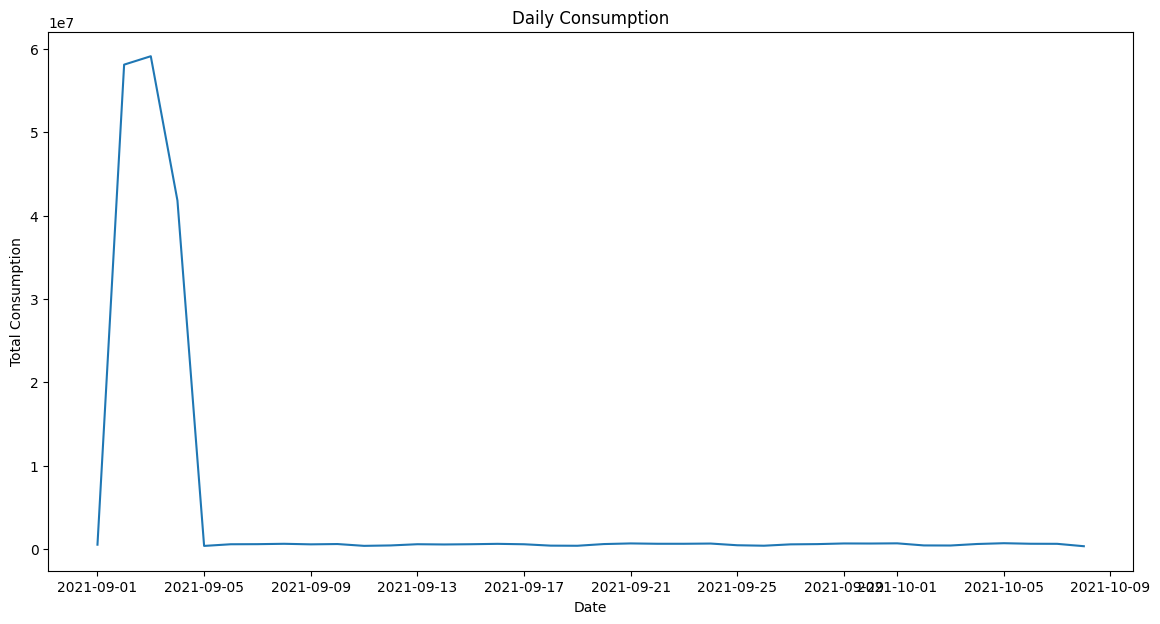

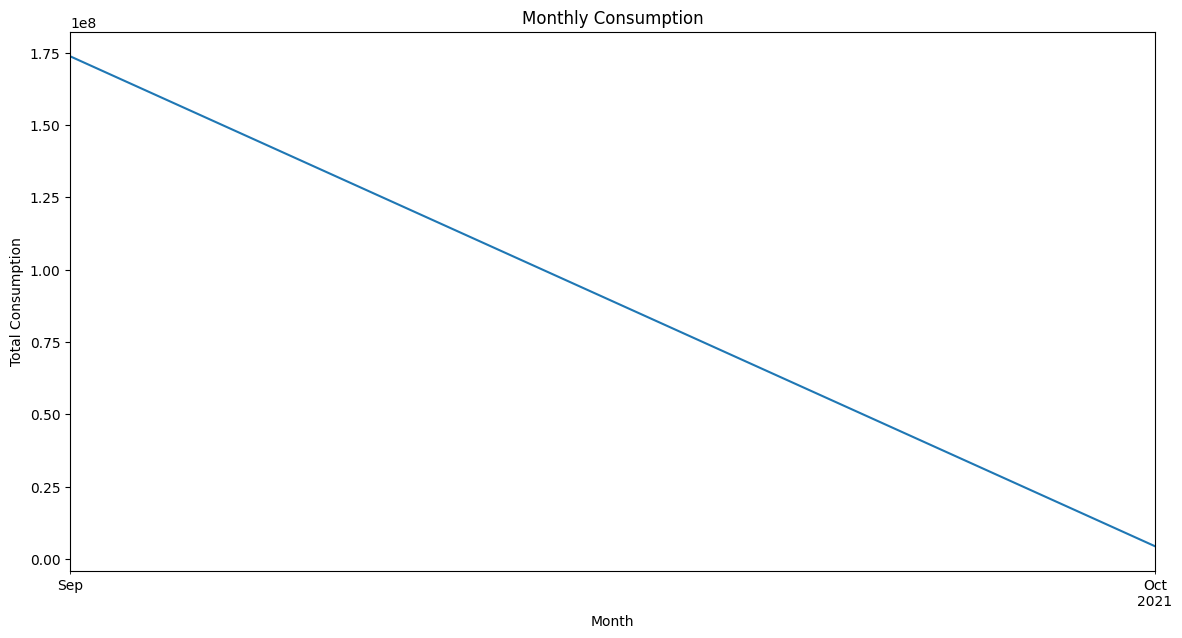

In [ ]:
# Daily consumption
daily_consumption = merged_train_forecast[merged_train_forecast['is_consumption'] == 1].groupby(merged_train_forecast['datetime'].dt.date)['target'].sum()
plt.figure(figsize=(14, 7))
daily_consumption.plot()
plt.title('Daily Consumption')
plt.xlabel('Date')
plt.ylabel('Total Consumption')
plt.show()

# Monthly consumption
monthly_consumption = merged_train_forecast[merged_train_forecast['is_consumption'] == 1].groupby(merged_train_forecast['datetime'].dt.to_period('M'))['target'].sum()
plt.figure(figsize=(14, 7))
monthly_consumption.plot()
plt.title('Monthly Consumption')
plt.xlabel('Month')
plt.ylabel('Total Consumption')
plt.show()


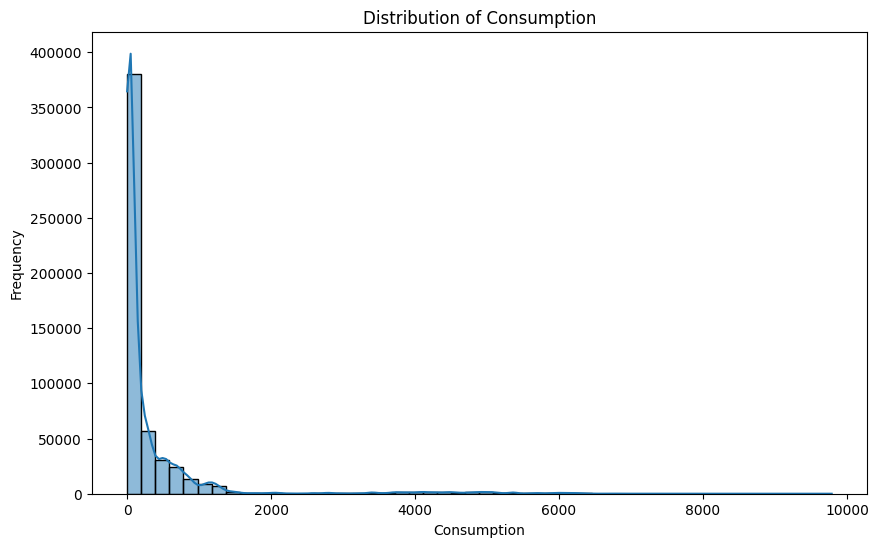

In [ ]:
# Distribution of consumption
plt.figure(figsize=(10, 6))
sns.histplot(merged_train_forecast[merged_train_forecast['is_consumption'] == 1]['target'], bins=50, kde=True)
plt.title('Distribution of Consumption')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Basic info
print(merged_train_forecast.info())
print(merged_train_forecast.describe())

# Check for missing values
missing_values = merged_train_forecast.isnull().sum()
print("Missing values:\n", missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159055 entries, 0 to 2159054
Data columns (total 26 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   county                             int64  
 1   is_business                        int64  
 2   product_type                       int64  
 3   target                             float64
 4   is_consumption                     int64  
 5   datetime                           object 
 6   data_block_id                      float64
 7   row_id                             float64
 8   prediction_unit_id                 float64
 9   latitude                           float64
 10  longitude                          float64
 11  origin_datetime                    object 
 12  hours_ahead                        float64
 13  temperature                        float64
 14  dewpoint                           float64
 15  cloudcover_high                    float64
 16  cloudcover_low    

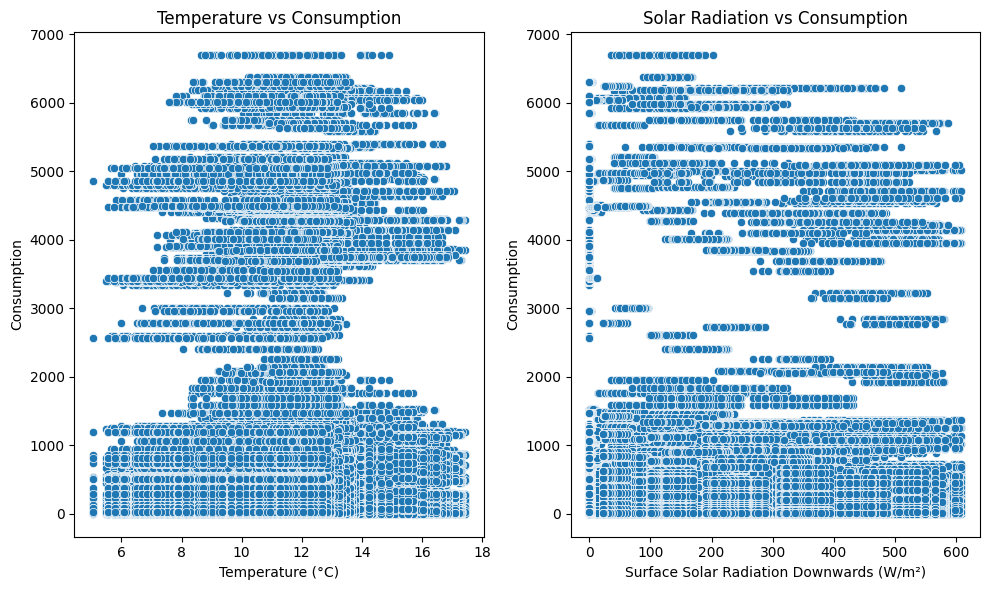

In [ ]:

# Filter data for consumption only
consumption_data = merged_train_forecast[merged_train_forecast['is_consumption'] == 1]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Effect of temperature on consumption
sns.scatterplot(ax=axes[0], data=consumption_data, x='temperature', y='target')
axes[0].set_title('Temperature vs Consumption')
axes[0].set_xlabel('Temperature (°C)')
axes[0].set_ylabel('Consumption')

# Effect of solar radiation on consumption
sns.scatterplot(ax=axes[1], data=consumption_data, x='surface_solar_radiation_downwards', y='target')
axes[1].set_title('Solar Radiation vs Consumption')
axes[1].set_xlabel('Surface Solar Radiation Downwards (W/m²)')
axes[1].set_ylabel('Consumption')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
missing_values = train.isnull().sum()
print(missing_values)

county                  0
is_business             0
product_type            0
target                396
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      1
dtype: int64


In [ ]:
# Check missing values in forecast weather data
missing_values_forecast = forecast_weather.isnull().sum()
print("Missing values in forecast weather data:")
print(missing_values_forecast)

Missing values in forecast weather data:
latitude                             0
longitude                            0
origin_datetime                      0
hours_ahead                          0
temperature                          0
dewpoint                             0
cloudcover_high                      1
cloudcover_low                       1
cloudcover_mid                       1
cloudcover_total                     1
10_metre_u_wind_component            1
10_metre_v_wind_component            1
data_block_id                        1
forecast_datetime                    1
direct_solar_radiation               1
surface_solar_radiation_downwards    1
snowfall                             1
total_precipitation                  1
dtype: int64


In [1]:

# Compute the correlation matrix
corr_matrix = merged_train_forecast[features + ['target']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Forecast Weather Features and Target Variable')
plt.show()

NameError: name 'merged_train_forecast' is not defined